In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from glob import glob
import librosa
import librosa.display 
import IPython.display as ipd
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(color_pal)

In [4]:
audio_files = glob(r'RAVDESS_UNCLEAN\*\*.wav')


In [5]:
audio_files[0]

'RAVDESS_UNCLEAN\\Actor_01\\03-01-01-01-01-01-01.wav'

In [73]:
ipd.Audio(audio_files[0])

In [74]:
y, sr = librosa.load(audio_files[0])
print(f"Signal Samples{y[:10]} and Shape of Signal {y.shape} ,Number of Samples {sr}|")

Signal Samples[ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09  3.8985988e-08
 -7.6543131e-08  1.1907758e-07 -1.6708444e-07  2.2135782e-07
 -2.8319053e-07  3.5470680e-07] and Shape of Signal (72838,) ,Number of Samples 22050|


<Axes: title={'center': 'RAW AUDIO SAMPLE'}>

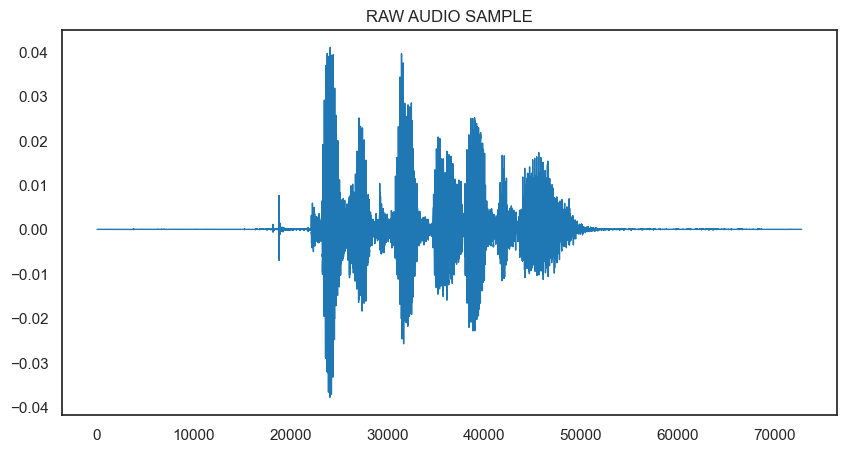

In [75]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title = "RAW AUDIO SAMPLE", color = color_pal[0])

<Axes: title={'center': 'Trimmed Trial Data'}>

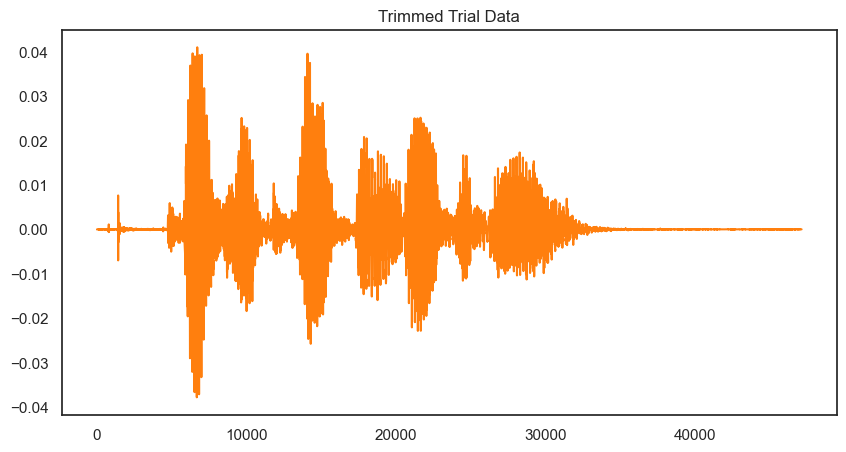

In [69]:
y_trimmed_trial, _ = librosa.effects.trim(y)
pd.Series(y_trimmed_trial).plot(figsize=(10, 5),title="Trimmed Trial Data", color = color_pal[1])



In [83]:
y_trimmed, _ = librosa.effects.trim(y, top_db=30)


<Axes: title={'center': 'Trimmed Data'}>

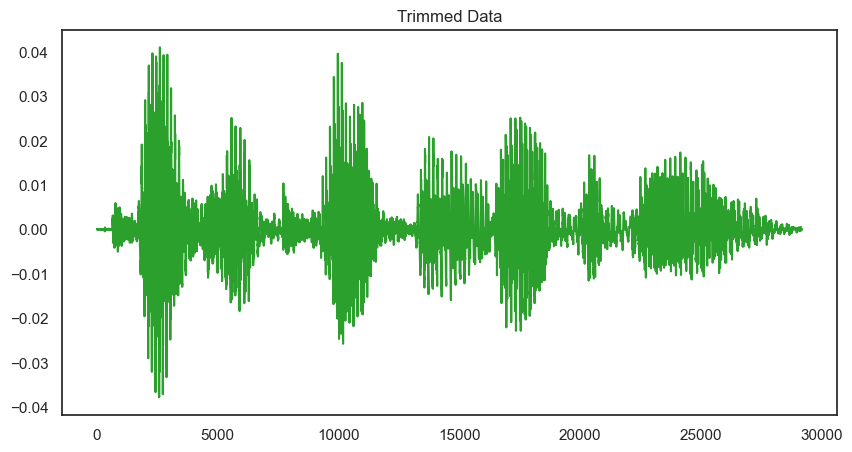

In [84]:

pd.Series(y_trimmed).plot(figsize=(10, 5),title="Trimmed Data", color = color_pal[2])

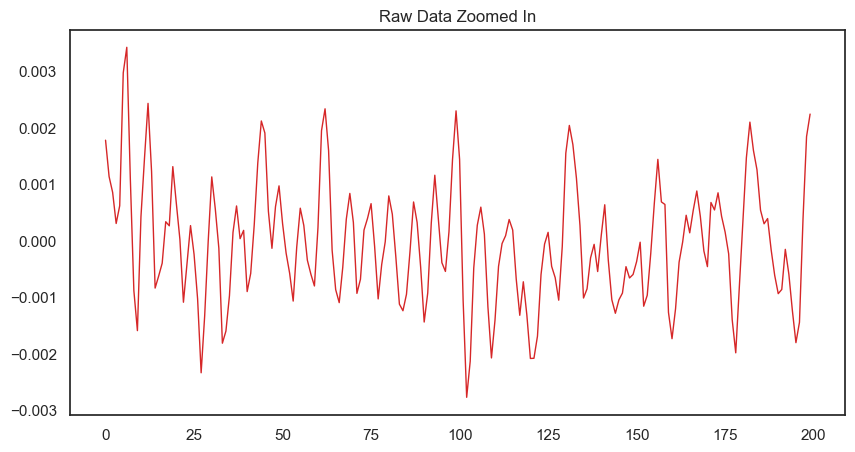

In [89]:
pd.Series(y[30000:30200]).plot(figsize=(10, 5), lw=1, title="Raw Data Zoomed In", color=color_pal[3])
plt.show()

In [91]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
S_db.shape

(1025, 143)

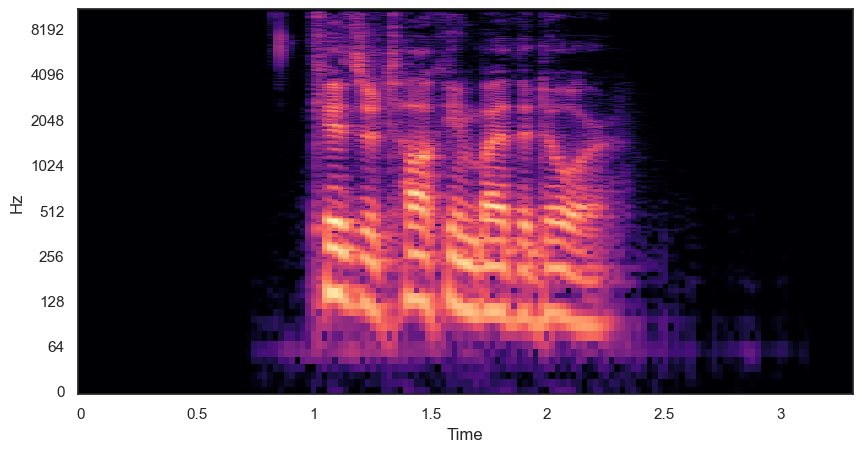

In [92]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)

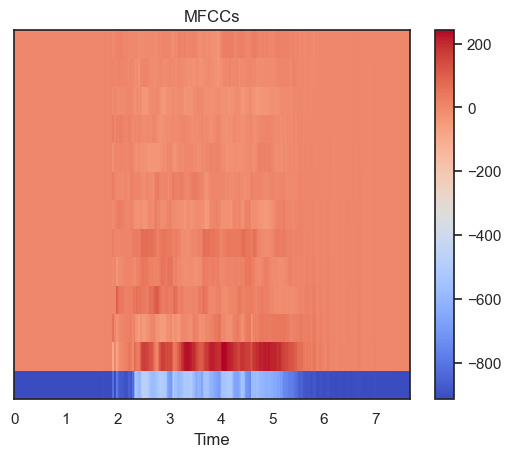

array([-915.0749 , -915.0749 , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -912.881  , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -914.953  , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -915.0749 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -914.0831 ,
       -915.0749 , -915.0749 , -915.0749 , -915.0749 , -909.12

In [98]:
audio_file_path = audio_files[0]
y, sr = librosa.load(audio_file_path, sr=None)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=int(sr*0.010), n_fft=int(sr*0.025))

# Display MFCCs
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()
mfccs[0]

In [6]:
audio_files[:10]

['RAVDESS_UNCLEAN\\Actor_01\\03-01-01-01-01-01-01.wav',
 'RAVDESS_UNCLEAN\\Actor_01\\03-01-01-01-01-02-01.wav',
 'RAVDESS_UNCLEAN\\Actor_01\\03-01-01-01-02-01-01.wav',
 'RAVDESS_UNCLEAN\\Actor_01\\03-01-01-01-02-02-01.wav',
 'RAVDESS_UNCLEAN\\Actor_01\\03-01-02-01-01-01-01.wav',
 'RAVDESS_UNCLEAN\\Actor_01\\03-01-02-01-01-02-01.wav',
 'RAVDESS_UNCLEAN\\Actor_01\\03-01-02-01-02-01-01.wav',
 'RAVDESS_UNCLEAN\\Actor_01\\03-01-02-01-02-02-01.wav',
 'RAVDESS_UNCLEAN\\Actor_01\\03-01-02-02-01-01-01.wav',
 'RAVDESS_UNCLEAN\\Actor_01\\03-01-02-02-01-02-01.wav']

In [7]:
lst = []
for file in audio_files:
    lst.append(file.split("-")[2])
   
   

In [8]:
Emotion = {"01":"neutral", "02":"calm", "03":"happy", "04":"sad", "05":"angry", "06":"fearful", "07":"disgust", "08":"surprised"}

In [9]:
column_name = "Filename"
df=pd.DataFrame(audio_files, columns=[column_name])

In [10]:
value_list = [Emotion[key] for key in lst]


In [11]:
value_list

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'fearful',
 'fearful',
 'fearful',
 'fearful',
 'fearful',
 'fearful',
 'fearful',
 'fearful',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'surprised',
 'surprised',
 'surprised',
 'surprised',
 'surprised',
 'surprised',
 'surprised',
 'surprised',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'fearfu

In [12]:
df["feeling"] = value_list

In [13]:
df.head()

,Filename,feeling
0,RAVDESS_UNCLEAN\Actor_01\03-01-01-01-01-01-01.wav,neutral
1,RAVDESS_UNCLEAN\Actor_01\03-01-01-01-01-02-01.wav,neutral
2,RAVDESS_UNCLEAN\Actor_01\03-01-01-01-02-01-01.wav,neutral
3,RAVDESS_UNCLEAN\Actor_01\03-01-01-01-02-02-01.wav,neutral
4,RAVDESS_UNCLEAN\Actor_01\03-01-02-01-01-01-01.wav,calm


In [41]:
df2 = pd.DataFrame()
result=np.array([])
for file in df["Filename"].tolist()[:2]:
    y, sr = librosa.load(file)
    y_trimmed, _ = librosa.effects.trim(y, top_db=30)
    stft=np.abs(librosa.stft(y_trimmed))
    mfccs=np.mean(librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mfcc=40).T, axis=0)
    mel=np.mean(librosa.feature.melspectrogram(y=y_trimmed, sr=sr).T,axis=0)
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
    result = np.hstack((result, mfccs, mel, chroma))
    

In [42]:
result.shape

(360,)

In [16]:
mfccs=np.mean(librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mfcc=40).T, axis=0)

In [17]:
mfccs

array([-3.6127197e+02,  5.2356258e+01, -4.9625878e+00, -1.2411789e+01,
       -1.1750564e+01, -1.4138451e+01, -2.0575493e+01, -1.1487005e+01,
       -2.0562305e+01, -7.1695704e+00, -1.6371426e+01, -1.0255711e+01,
       -1.0169391e+01, -4.3556385e+00,  1.2745221e+00,  4.0254024e-01,
        2.8220363e+00,  1.1183156e+01,  5.2998364e-01,  2.6540070e+00,
        3.2200730e+00,  3.1911089e+00,  5.1706357e+00,  7.7622147e+00,
        4.4844193e+00,  4.7344298e+00,  1.1404526e+00,  5.1265020e+00,
        3.9783776e-01,  4.2914500e+00,  8.8733226e-01,  1.9985071e+00,
       -9.7513175e-01,  7.2859776e-01, -1.0361267e-01,  1.9101493e+00,
       -1.0535711e+00, -4.9233449e-01, -2.9008720e+00,  5.9253258e-01],
      dtype=float32)

In [19]:
mel=np.mean(librosa.feature.melspectrogram(y=y_trimmed, sr=sr).T,axis=0)

In [25]:
stft=np.abs(librosa.stft(y_trimmed))

In [26]:
chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)

In [30]:

for array in :
    df2 = pd.concat([df, pd.DataFrame(array)], axis=1)


In [34]:
df2

,0
0,-485.435760
1,125.547394
2,-9.674954
3,24.648430
4,14.435009
...,...
259195,0.569740
259196,0.611529
259197,0.605674
259198,0.624910
